In [1]:
'''
CS585 Image and Video Computing
Lab 2 Part I
--------------
This program introduces the following concepts:
a) Finding objects in a binary image
b) Filtering objects based on size
c) Obtaining information about the objects described by their contours
--------------
'''

# Global variables
thresh = 128
max_thresh = 255

# OpenCV at this moment (2024) is a tricky thing to learn, but very convenient tool for "quick" image proccessing. When compared to deep-learning-focused libraries such as Pytorch or Huggingface,
# OpenCV is more CV-oriented, and provide a lot of straightforward image processing algorithms that are easy to implement (if you are familiar with them). So it is very good for testing simple ideas for complicated stuff.
# The downside is, OpenCV is mostly C/C++ based, and merely developed to support Python. Consequently, it's hard to learn how certain things in OpenCV if without looking into the C/C++ code
# from OpenCV. Also, certain amount of algorithms in OpenCV are "classic" algorithms, which are not the so-called "state-of-the-art" algorithms anymore, so personally I don't recommend
# spending too much time to understand them in a source code level. Therefore, in this lab, we are going to utilize as much online resources as possible to get the "code" things done while
# spending more time on the ideas of the algorithms and specific CV problems themselves. The purpose of the lab is to get the "code" thing done as quickly as possible, and leave enough time
# for you to think about more high-level problem about computer vision.


In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

thresh = 128
max_thresh = 255

def show_image(cv_image):
  # different ways of displaying a opencv image other than using opencv itself
  # https://www.geeksforgeeks.org/how-to-display-an-opencv-image-in-python-with-matplotlib/ matplotlib
  # https://www.geeksforgeeks.org/convert-opencv-image-to-pil-image-in-python/ Pillow

  cv2_imshow(cv_image)

def thresholding(image_cv_gray):
  # an example to do thresholding
  # https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html
  _, thres_output = cv2.threshold(image_cv_gray, thresh, max_thresh, 0)
  return thres_output

def get_contours(cv_image_thres):
  # an example how to detect and draw contours found in an image
  # https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html

  # double check the interfaces are consistent for the latest opencv version
  # https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html#ga95f5b48d01abc7c2e0732db24689837b

  contours, hierarchy = cv2.findContours(cv_image_thres, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  return contours
def draw_contours(cv_image, contours,fill='line'):
  # an example how to detect and draw contours found in an image
  # https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html

  # double check the interfaces are consistent for the latest opencv version
  # https://docs.opencv.org/3.4/d6/d6e/group__imgproc__draw.html#ga746c0625f1781f1ffc9056259103edbc

  # fill the contour instead of just draw the line:
  # https://stackoverflow.com/questions/19222343/filling-contours-with-opencv-python
  if fill=='solid':
    cv_image_out = cv2.drawContours(cv_image, contours, -1,(0,255,0),cv2.FILLED)
  else:
    cv_image_out = cv2.drawContours(cv_image, contours, -1,(0,255,0),1)
  return cv_image_out

def get_largest_contour(contours):
  # https://stackoverflow.com/questions/8369547/checking-contour-area-in-opencv-using-python
  max_area = 0
  max_i = -1
  for i,contour in enumerate(contours):
    area = cv2.contourArea(contour)
    if area > max_area:
      max_i = i
      max_area = area
  return [contours[max_i]]

def init_canvas(size,mode='color'):
  # if we observe the type of openCV-read image data,
  # the quickest way is to simply create a all-zero ndarray
  cols,rows = size
  if mode == 'color':
    canvas = np.zeros((rows,cols,3))
  elif mode == 'grayscale':
    canvas = np.zeros((rows,cols))
  elif mode == 'binary':
    canvas = np.zeros((rows,cols)).astype(np.uint8)
  else:
    raise NotImplementedError
  return canvas

# check here to see how to pre-process:
# https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html
image_cv = cv2.imread("hand.jpg", cv2.IMREAD_COLOR)
image_cv_gray = cv2.cvtColor(image_cv, cv2.COLOR_BGR2GRAY)
image_cv_blur = cv2.blur(image_cv_gray, (3, 3))
image_cv_threhold = thresholding(image_cv_blur)

# Mind the document says that
# "Source, an 8-bit single-channel image. Non-zero pixels are treated as 1's. Zero pixels remain 0's, so the image is treated as binary .
# so you need a binary formatted image to get contours
contours = get_contours(image_cv_threhold)

max_contour = get_largest_contour(contours)

canvas = init_canvas((image_cv_gray.shape[1],image_cv_gray.shape[0]))
image_cv_out = draw_contours(image_cv,contours)

show_image(image_cv_out)

# what is not covered (but you should try to make your life eaiser for coding assignment)
# Documentation for createTrackbar: http://docs.opencv.org/modules/highgui/doc/user_interface.html?highlight=createtrackbar#createtrackbar
# Example of adding a trackbar: http://docs.opencv.org/doc/tutorials/highgui/trackbar/trackbar.html

ModuleNotFoundError: No module named 'google.colab'

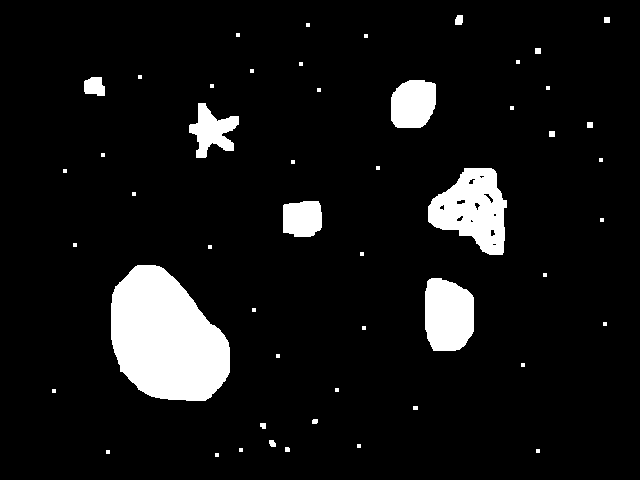

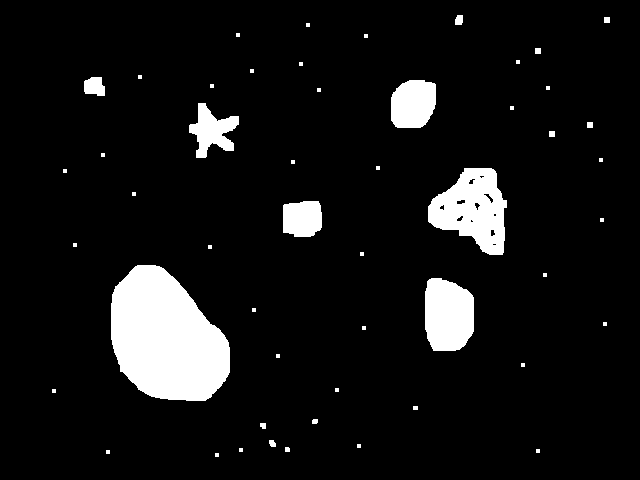

In [ ]:
def morph_image(image,morph, kernel_size):
  # modify the code from here:
  # https://docs.opencv.org/3.4/db/df6/tutorial_erosion_dilatation.html this example is too complicated which I don't like it, but still worth taking a look.
  # https://pyimagesearch.com/2021/04/28/opencv-morphological-operations/ a more straightfoward example, but miss details that might be interesting to you.

  def erosion(image_cv, kernel_size = 4):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size,kernel_size))
    image_cv_eroded = cv2.erode(image_cv, kernel)
    return image_cv_eroded
  def dilate(image_cv, kernel_size = 4):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size,kernel_size))
    image_cv_dilated = cv2.dilate(image_cv, kernel)
    return image_cv_dilated
  if morph == 'dilate':
    image_morphed = dilate(image,kernel_size = kernel_size)
  elif morph == 'erode':
    image_morphed = erosion(image,kernel_size = kernel_size)
  else:
    raise NotImplementedError
  return image_morphed

image_cv = cv2.imread("blob.png", cv2.IMREAD_COLOR)
image_cv_gray = cv2.cvtColor(image_cv, cv2.COLOR_BGR2GRAY)
_, image_binary = cv2.threshold(image_cv_gray, 0.0, 255.0, cv2.THRESH_BINARY)
# image_morphed = morph_image(morph_image(image_binary,morph='erode', kernel_size=2),morph='dilate',kernel_size=10)
image_morphed = morph_image(image_binary,morph='erode', kernel_size=100)
morphed_contours = get_contours(image_morphed)
image_cv_out = draw_contours(image_cv,morphed_contours,fill='solid')

show_image(image_binary)
print("")
show_image(image_cv_out)

